In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Epileptic Seizure Recognition.csv')
df=df.drop('Unnamed',axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
df.describe().loc[['count','mean','min','std','max']]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [6]:
X=df.loc[:,["X38","X31","X33","X27","X36","X28","X21","X30","X40","X51","X2","X39","X13","X70","X72","X77","X81"]].values
Y=df['y'].values

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans
wcss=[]
cl=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
  cl.append(i)
print (wcss) 
print (cl)

[195500.0, 180134.57691769637, 166735.0628457041, 154463.70997434048, 147185.88650650633, 141660.5157313396, 138292.81603959057, 134961.1146840458, 131986.57405834727, 129293.0600032577]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Text(0.5, 1.0, 'Elbow method')

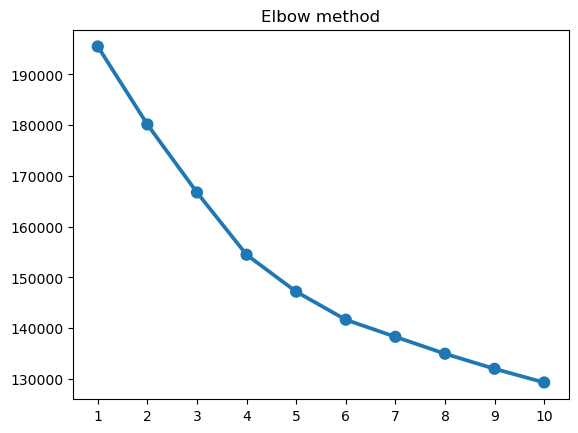

In [9]:
sns.pointplot(x=cl,y=wcss)
plt.title('Elbow method')

In [17]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

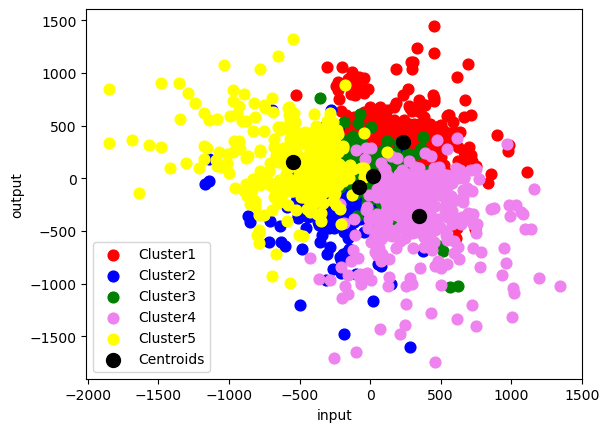

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('input') 
plt.ylabel('output')
plt.legend() 

plt.show()

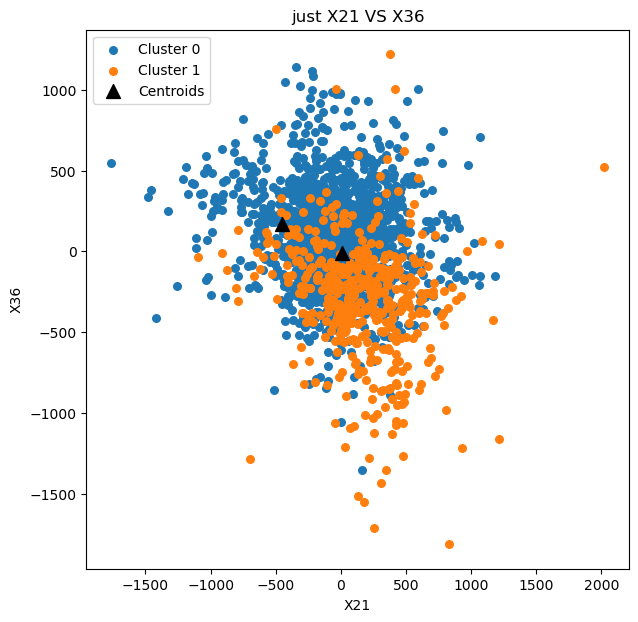

In [15]:
plt.subplots(figsize=(7,7))
plt.scatter(df[df.cluster==0]['X21'],df[df.cluster==0]['X36'],s=30,label='Cluster 0')
plt.scatter(df[df.cluster==1]['X21'],df[df.cluster==1]['X36'],s=30,label='Cluster 1')
kmc=scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(kmc[:,0],kmc[:,1],c='black',s=100,marker='^',label='Centroids')
plt.title('just X21 VS X36')
plt.xlabel('X21')
plt.ylabel('X36')
plt.legend(loc=2)
plt.show()

In [12]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
data = df.values
data=data.tolist()

In [4]:
conda install -c conda-forge pyclustering

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jothe\anaconda3

  added / updated specs:
    - pyclustering


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyclustering-0.10.1.2      |   py39h2e07f2f_1         2.3 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  pyclustering       conda-forge/win-64::pyclustering-0.10.1.2-py39h2e07f2f_1 None
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None




pyclustering-0.10.1. | 2.3 MB    |            |   0% 
pyclustering-0.10.1. | 2.3 MB    |            |   1% 
pyclustering-0.10.1. | 2.3 MB    | 6          |   7% 
pyclustering-0.10.1. | 2.3 MB    | #          | 



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda


